In [7]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [8]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

In [9]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [10]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                         mean       std    median      5.0%     95.0%     n_eff     r_hat
               A[0]      0.06      0.58      0.08     -0.76      1.00    179.09      1.00
         alpha_1[0]     -1.17      1.60     -1.06     -3.93      1.29     75.84      1.03
         alpha_2[0]     -0.30      0.48     -0.30     -1.05      0.49    111.37      1.00
          beta_1[0]      0.75      0.38      0.71      0.16      1.36    546.50      1.00
          beta_2[0]      2.30      0.78      2.16      0.96      3.48    106.08      1.00
        eta_high[0]     26.13     14.99     26.11      4.87     49.97    510.38      1.00
         eta_low[0]     24.36     14.51     24.36      0.47     45.03    365.21      1.00
         eta_max[0]      4.61      2.68      4.42      0.00      8.64    226.50      1.01
         eta_min[0]     30.44     11.30     30.72     12.34     47.27    337.26      1.00
      gamma_high[0]      6.08      1.20      6.11      4.38      7.89    412.73      1.00
       ga

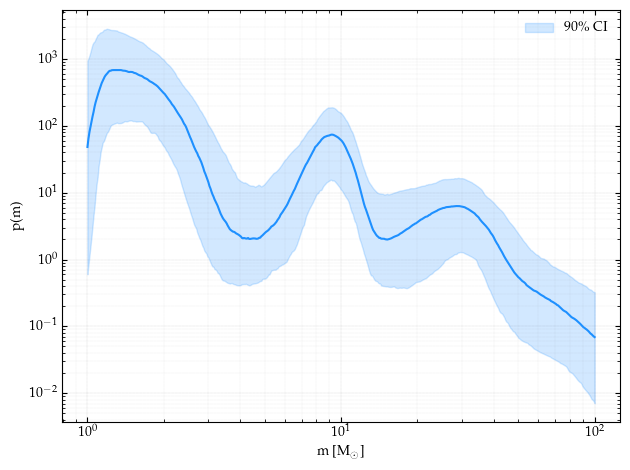

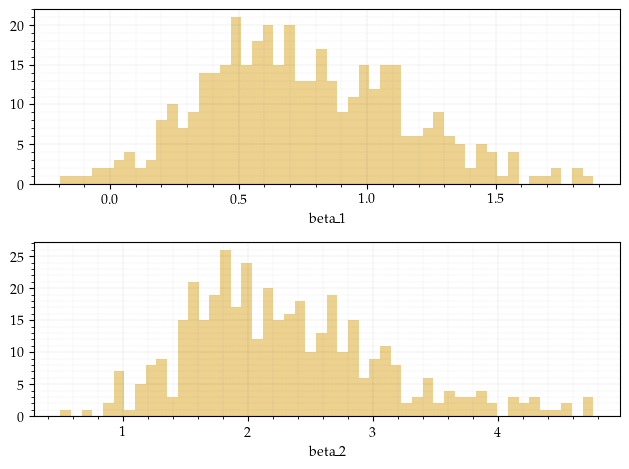

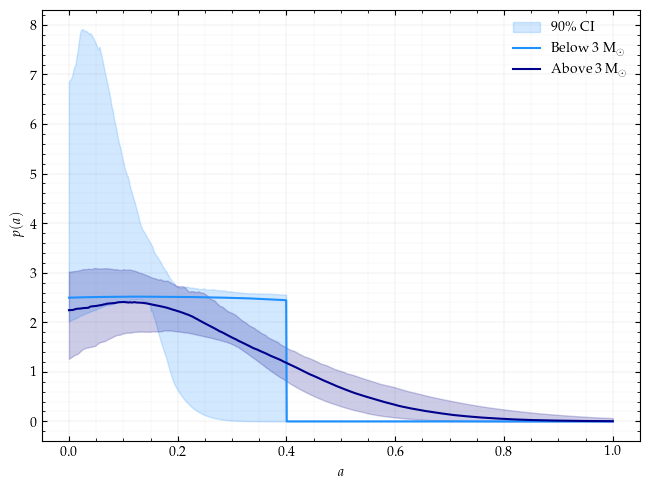

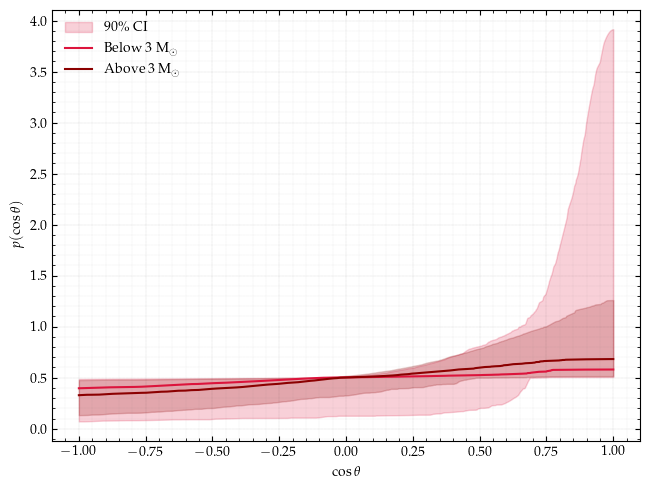

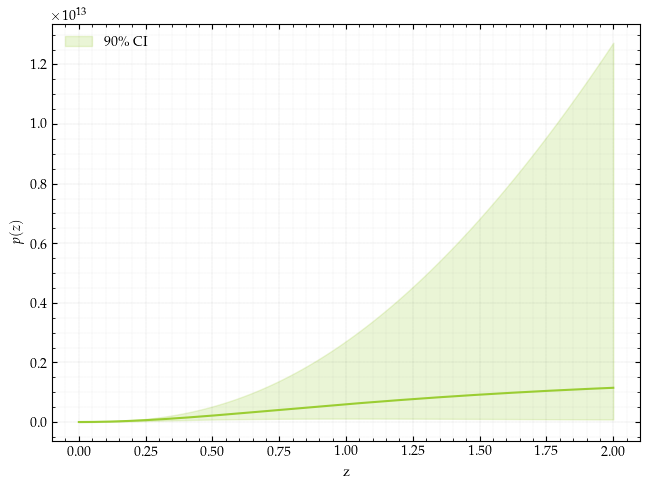

In [11]:
from config.mass1d_func import pdb_with_NG
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb_with_NG)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")

(array([ 2.,  0.,  0.,  1.,  0.,  5.,  4.,  3.,  5., 10., 16., 12., 10.,
         9., 21., 19., 24., 15., 16., 22., 24., 25., 28., 20., 14., 17.,
        12., 12., 10., 20.,  8.,  5.,  3.,  1.,  2.,  2.,  2.,  0.,  0.,
         1.]),
 array([-2.56187457, -2.34905472, -2.13623486, -1.923415  , -1.71059515,
        -1.49777529, -1.28495543, -1.07213558, -0.85931572, -0.64649587,
        -0.43367601, -0.22085615, -0.0080363 ,  0.20478356,  0.41760342,
         0.63042327,  0.84324313,  1.05606299,  1.26888284,  1.4817027 ,
         1.69452255,  1.90734241,  2.12016227,  2.33298212,  2.54580198,
         2.75862184,  2.97144169,  3.18426155,  3.39708141,  3.60990126,
         3.82272112,  4.03554097,  4.24836083,  4.46118069,  4.67400054,
         4.8868204 ,  5.09964026,  5.31246011,  5.52527997,  5.73809982,
         5.95091968]),
 <BarContainer object of 40 artists>)

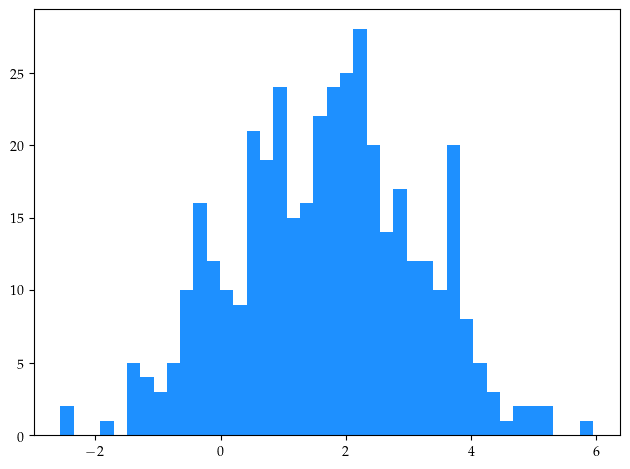

In [13]:
plt.hist(posterior_samples["kappa"], bins = 40)